***Assignment 1***
----

***Submitted by Rahul Raju Pattar***


*Write a Function for calculating the Parametric VaR of DLF (40%), NTPC (20%)
And HDFC Bank (40%). Take historical data for last 500 days before 1st Oct,
2019 and a 99% VaR confidence level.
The date chosen is for previous year as we deliberately wanted not to include
market data from January 2020.*

***Discussion:***

**The main assumptions in calculating parametric VaR are**:

**1.** Asset returns are normally distributed.\
**2.** Asset returns are assumed to be serially independent in that no prior return should influence the current return.

**In the following, the main procedure for the calculating parametric VaR of the portfolio consisting of the given stocks is outlined:**

**Step 1.** Download the historical data from Yahoo finance and calculate the mean and standard of the portfolio. \
**Step 2.** We use the calculated standard deviation to compute a standard normal z score.\
**Step 3.** We determine our risk position with a degree of confidence (99%) from the standard normal table.




In [2]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import scipy.stats as stats

***STEP 1***
-----

In [3]:
stocks_list = ['DLF.NS','NTPC.NS','HDFCBANK.NS']
weights = [0.4,0.2,0.4]

In [4]:
end_date        = dt.datetime(2019,10,1)
time_difference = dt.timedelta(days = 500)
start_date      = end_date - time_difference
print(start_date)

2018-05-19 00:00:00


In [4]:
confidence = 99

In [5]:
#Function to calculate parametric VaR for a portfolio of given stocks.

def Parametric_VaR(stocks_list, start_date, end_date, weights, confidence):
    
    #Download the Stock prices from yfinance and remove the missing rows
    full_data = yf.download(stocks_list, start = start_date, end = end_date)
    data = full_data.copy(deep=True)
    data = data['Adj Close'].dropna()
    
    #Calculate the daily returns for each of stocks
    returns = np.log(data).diff()
    returns = returns[stocks_list]
    returns = returns.dropna()
    
    #Calculate the daily portfolio returns
    Portfolio_Returns = np.sum(weights*returns, axis = 1)
    plt.hist(Portfolio_Returns)
    plt.hist(Portfolio_Returns*1_000_000)
    plt.xlabel('Portfolio Returns')
    plt.ylabel('Frequency')
    
    #Calculate the mean and standard deviation of the daily portfolio returns
    mean_returns    = Portfolio_Returns.mean()
    std_dev = Portfolio_Returns.std()
    
    #Calculate the parametric Var
    Param_VaR = mean_returns - stats.norm.ppf(confidence/100) * std_dev
    
    return Param_VaR
    

***STEP 2***
-----------

[*********************100%%**********************]  3 of 3 completed


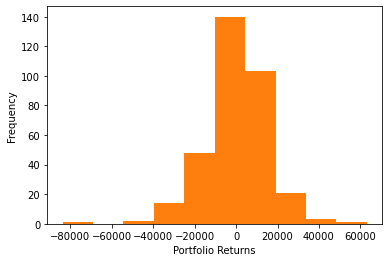

In [6]:
Param_VaR = Parametric_VaR(stocks_list, start_date, end_date, weights, confidence)

***STEP 3***
--------

In [7]:
print("Parametric {}% VaR is: {:.4f}".format(confidence, Param_VaR))

Parametric 99% VaR is: -0.0347


In [8]:
print("Parametric {}% VaR for an investment of 1 million in the portfolio is: {:.4f}".format(confidence, Param_VaR*1_000_000))

Parametric 99% VaR for an investment of 1 million in the portfolio is: -34700.5881
